# Tarea 5 Proyecto Análisis de Datos
## Modelo de regresión lineal
## Wilder Araque Caicedo
### Análisis de Datos
### UNAD

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Cargue del dataset car details v4.csv desde ruta del notebook
Titanic = pd.read_csv('Titanic-Dataset.csv')
# Información del dataset: cantidad de datos, columnas y tipo de dato
Titanic.info()
# Identificación de la mediana, valor mínimo y máximo y los cuartiles
Titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Identificación de valores en blanco (NaN)
print(Titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


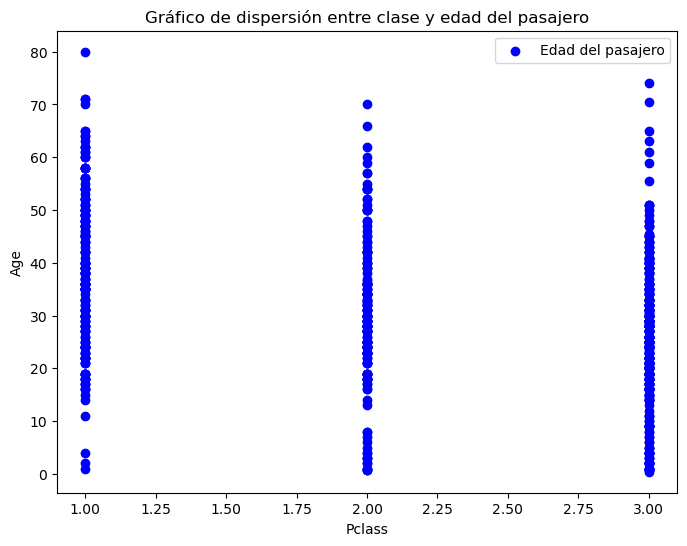

In [18]:
# identificación de valores atípicos a través de variables para la regresión
x = Titanic['Pclass']
y = Titanic['Age']

# Gráfico de dispersión de las variables
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', label='Edad del pasajero')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Gráfico de dispersión entre clase y edad del pasajero')
plt.legend()
plt.show()

In [29]:
# Reemplazo de valores en blanco con la media para cada columna numérica relevante
Titanic.fillna(Titanic.mean(numeric_only=True), inplace=True)

In [78]:
# Verificación de valores nulos restantes
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
# Convertir la columna 'Sex' a valores numéricos
Titanic['Sex'] = Titanic['Sex'].map({'male': 1, 'female': 2})

In [156]:
# Cálculo de la media y mediana de los valores de Sex
median_sex = Titanic['Sex'].median()  
print(f"La mediana de la columna 'Sex' es: {median_sex}")

mean_sex = Titanic['Sex'].mean()  
print(f"La media de la columna 'Sex' es: {mean_sex}")

La mediana de la columna 'Sex' es: nan
La media de la columna 'Sex' es: nan


In [40]:
# Eliminación de valores atípicos por el método de cuartiles

# Identificar y eliminar valores atípicos en la columna 'Price' usando el rango intercuartílico (IQR)
Q1 = Titanic['Age'].quantile(0.25)
Q3 = Titanic['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar valores atípicos
limiteInferior = Q1 - 1.5 * IQR
limiteSuperior = Q3 + 1.5 * IQR

# Filtrar los datos para excluir los valores atípicos de 'Age'
DatasetTitanicSinOutliers = Titanic[(Titanic['Age'] >= limiteInferior) & (Titanic['Age'] <= limiteSuperior)]

# Comparación del tamaño del DataFrame original y el nuevo sin valores atípicos
print("Tamaño original:", Titanic.shape[0])
print("Tamaño sin valores atípicos:", DatasetTitanicSinOutliers.shape[0])

Tamaño original: 891
Tamaño sin valores atípicos: 825


In [142]:
# Selección de variable dependiente 'Price' e independientes 'Year' y 'Kilometer'
X = Titanic[['Age', 'Pclass']]  # Variables independientes
y = Titanic['Survived']                  # Variable dependiente

In [144]:
# Selección de datos Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Identificación de valores nulos o faltantes en la variable y
print(y_train.isnull().sum())

0


In [148]:
print(X_train.isnull().sum())

Age       0
Pclass    0
dtype: int64


In [150]:
# Creación del modelo de regresión lineal para los datos de entrenamiento
regresionLineal = LinearRegression()

# Entrenamiento del modelo
regresionLineal.fit(X_train, y_train)

LinearRegression()

In [158]:
# Predicciones en el conjunto de prueba sobre el modelo entrenado
y_pred = regresionLineal.predict(X_test)

In [174]:
# Conversión de probabilidades en etiquetas
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

In [176]:
# Evaluación del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       105
           1       0.79      0.55      0.65        74

    accuracy                           0.75       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.75      0.74       179



In [178]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94 11]
 [33 41]]


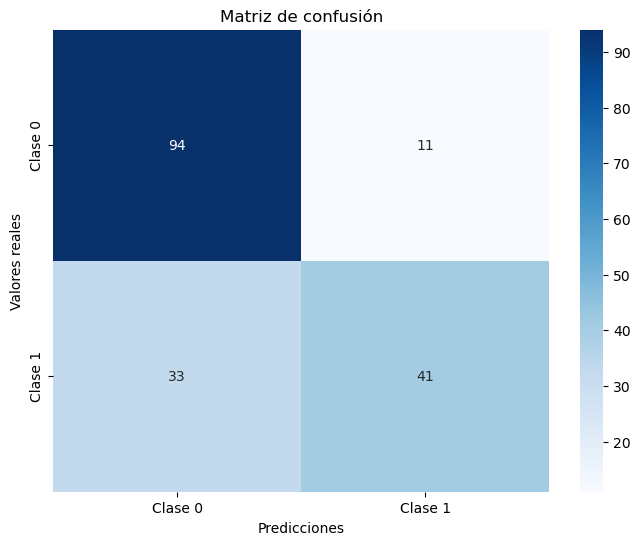

In [180]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [182]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión global (Accuracy): {accuracy}")

Precisión global (Accuracy): 0.7541899441340782


In [160]:
# Cálculo del error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Cáculo del coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1886047582606605
R-squared (R2): 0.22225417510555678


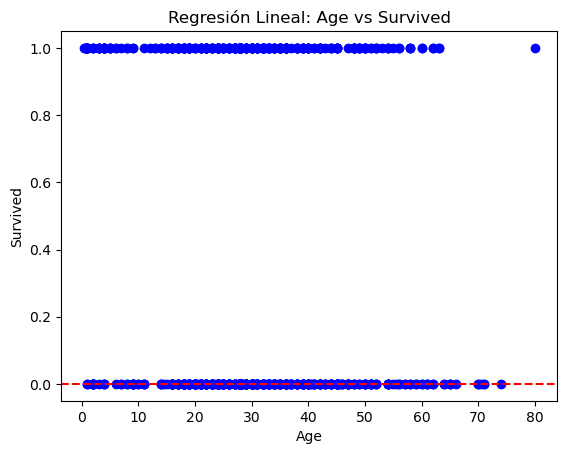

In [166]:
plt.scatter(Titanic['Age'], y, color='blue', label='Tasa de supervivencia')
plt.xlabel('Age')
plt.ylabel("Survived")
plt.title('Regresión Lineal: Age vs Survived')
plt.axhline(0, color='red', linestyle='--')
plt.show()

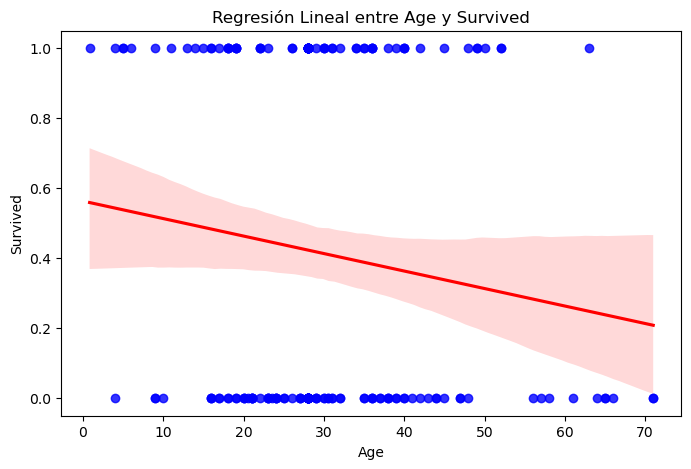

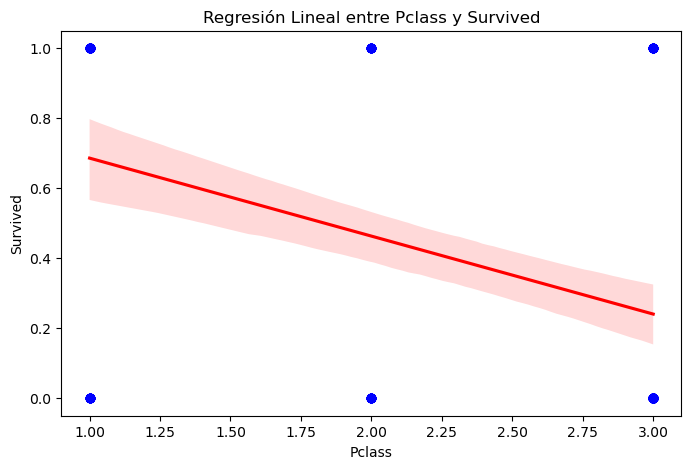

In [170]:
for Pclass in X_test.columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=X_test[Pclass], y=y_test, line_kws={"color": "red"}, scatter_kws={"color": "blue"})
    plt.xlabel(Pclass)
    plt.ylabel("Survived")
    plt.title(f'Regresión Lineal entre {Pclass} y Survived')
    plt.show()